In [2]:
import os
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

We will clean (handle missing values), then visualize CWUR data with focus on publications and citations of universities.

In [3]:
# read the data
datapath = "data/university_data/"

cwur = pd.read_csv(datapath + "/cwurData.csv")
hdi = pd.read_csv(datapath + "/Human_Development_Index.csv")
display(cwur)



,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


Check for missing values and handle them accordingly.

Missing values: True
Column and respective missing values: 
world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64


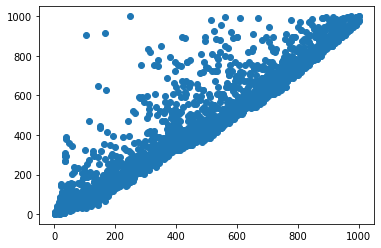

In [4]:
#Are there any missing values?
print('Missing values:', cwur.isnull().values.any())

#How many and in what column?
print('Column and respective missing values: ')
print(cwur.isnull().sum())

#First glance at the data suggests, that the missing value column broad impact seems to correlate with world rank:
plt.scatter(cwur['world_rank'], cwur['broad_impact'])


#Use Encoder to encode categories (country, institution)
encInst = sk.preprocessing.LabelEncoder().fit(cwur['institution'])
encCon = sk.preprocessing.LabelEncoder().fit(cwur['country'])

cwur['institution']  = encInst.transform(cwur['institution'])
cwur['country'] =  encCon.transform(cwur['country'])

#general cutoff for imputation without introducing biass is 3% of rows contained with missing values -> 
#use multivariate imputation
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(cwur)

cwur_imputed = pd.DataFrame(imp.transform(cwur), columns = cwur.columns)

# TODO: MIGHT NEED LATER IN ANOTHER CELL

#cwur_imputed['country'] = encCon.inverse_transform(cwur['country'])
#cwur_imputed['institution'] = encInst.inverse_transform(cwur['institution'])



[(-9.0, 1010.0)]

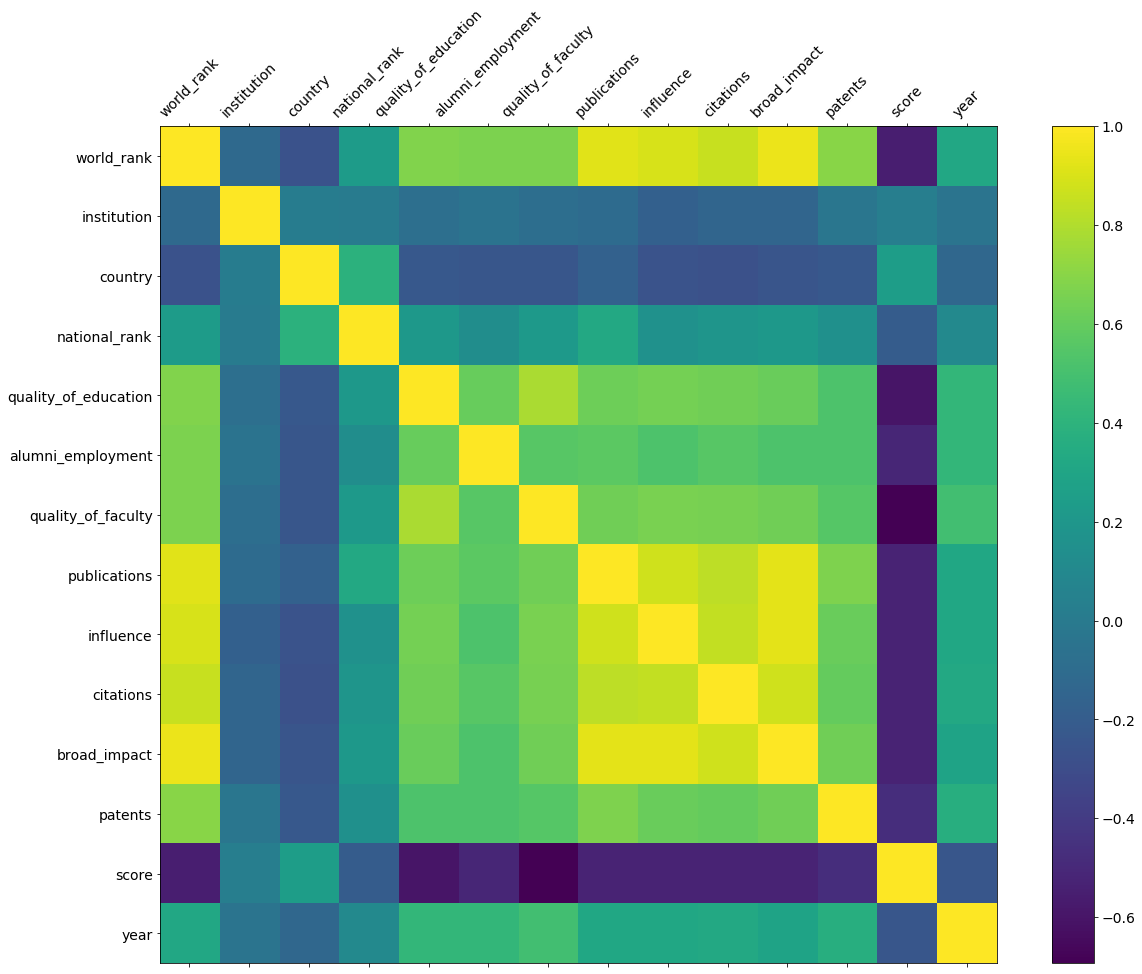

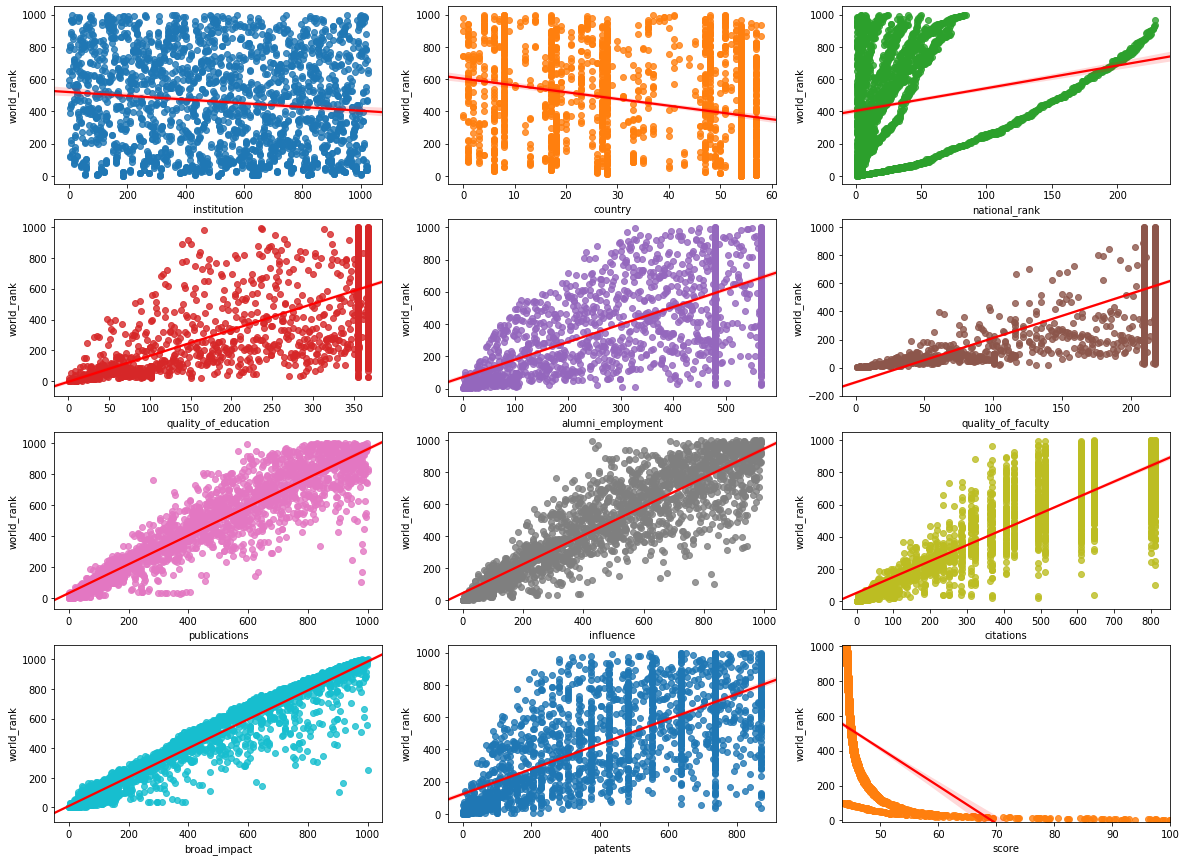

In [5]:
#Visualize Data

#Heatmap
fig1 = plt.figure(figsize=(20, 15))
plt.matshow(cwur_imputed.corr(), fignum=fig1.number)
plt.xticks(range(cwur_imputed.shape[1]), cwur_imputed.columns, fontsize=14, rotation=45)
plt.yticks(range(cwur_imputed.shape[1]), cwur_imputed.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

#scatterplots vs. world rank

fig2, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

sb.regplot(y='world_rank', x='institution', data=cwur_imputed,  line_kws = {'color':'red'}, ax=axs[0,0])
sb.regplot(y='world_rank', x='country', data=cwur_imputed,  line_kws = {'color':'red'}, ax=axs[0,1])
sb.regplot(y='world_rank', x='national_rank', data=cwur_imputed,  line_kws = {'color':'red'}, ax=axs[0,2])

sb.regplot(y='world_rank', x='quality_of_education', data=cwur_imputed,  line_kws = {'color':'red'}, ax=axs[1,0])
sb.regplot(y='world_rank', x='alumni_employment', data=cwur_imputed,  line_kws = {'color':'red'}, ax=axs[1,1])
sb.regplot(y='world_rank', x='quality_of_faculty', data=cwur_imputed,  line_kws = {'color':'red'}, ax=axs[1,2])

sb.regplot(y='world_rank', x='publications', data=cwur_imputed,  line_kws = {'color':'red'}, ax=axs[2,0])
sb.regplot(y='world_rank', x='influence', data=cwur_imputed,  line_kws = {'color':'red'}, ax=axs[2,1])
sb.regplot(y='world_rank', x='citations', data=cwur_imputed,  line_kws = {'color':'red'}, ax=axs[2,2])

sb.regplot(y='world_rank', x='broad_impact', data=cwur_imputed,  line_kws = {'color':'red'}, ax=axs[3,0])
sb.regplot(y='world_rank', x='patents', data=cwur_imputed,  line_kws = {'color':'red'}, ax=axs[3,1])
sb.regplot(y='world_rank', x='score', data=cwur_imputed,  line_kws = {'color':'red'}, ax=axs[3,2])
axs[3,2].set(xlim=(cwur_imputed['score'].min(), cwur_imputed['score'].max()))
axs[3,2].set(ylim=(cwur_imputed['world_rank'].min()-10, cwur_imputed['world_rank'].max()+10))




world_rank  country  national_rank  quality_of_education  \
year   institution                                                             
2012.0 184.0               NaN      NaN            NaN                   NaN   
       312.0               NaN      NaN            NaN                   NaN   
       511.0               NaN      NaN            NaN                   NaN   
       637.0               NaN      NaN            NaN                   NaN   
       53.0                NaN      NaN            NaN                   NaN   
       432.0               NaN      NaN            NaN                   NaN   
       819.0               NaN      NaN            NaN                   NaN   
       999.0               NaN      NaN            NaN                   NaN   
       96.0                NaN      NaN            NaN                   NaN   
       627.0               NaN      NaN            NaN                   NaN   
       648.0               NaN      NaN            NaN                   NaN   
       100.0               NaN      NaN            NaN                   NaN   
       828.0               NaN      NaN            NaN                   NaN   
       907.0               NaN      NaN            NaN                   NaN   
       242.0               NaN      NaN            NaN                   NaN   
       522.0               NaN      NaN            NaN                   NaN   
       275.0               NaN      NaN            NaN                   NaN   
       984.0               NaN      NaN            NaN                   NaN   
       630.0               NaN      NaN            NaN                   NaN   
       633.0               NaN      NaN            NaN                   NaN   
       452.0               NaN      NaN            NaN                   NaN   
       186.0               NaN      NaN            NaN                   NaN   
       379.0               NaN      NaN            NaN                   NaN   
       634.0               NaN      NaN            NaN                   NaN   
       944.0               NaN      NaN            NaN                   NaN   
       713.0               NaN      NaN            NaN                   NaN   
       118.0               NaN      NaN            NaN                   NaN   
       207.0               NaN      NaN            NaN                   NaN   
       899.0               NaN      NaN            NaN                   NaN   
       901.0               NaN      NaN            NaN                   NaN   
...                        ...      ...            ...                   ...   
2015.0 152.0              -3.0      0.0           -2.0                  12.0   
       200.0               4.0      0.0            4.0                  12.0   
       565.0               NaN      NaN            NaN                   NaN   
       139.0              55.0      0.0            4.0                  12.0   
       490.0               NaN      NaN            NaN                   NaN   
       545.0               NaN      NaN            NaN                   NaN   
       34.0               -8.0      0.0            1.0                  12.0   
       846.0              30.0      0.0            1.0                  12.0   
       1010.0             27.0      0.0            0.0                  12.0   
       647.0              17.0      0.0            0.0                  12.0   
       733.0              37.0      0.0            0.0                  12.0   
       72.0                0.0      0.0            3.0                  12.0   
       143.0              55.0      0.0            3.0                  12.0   
       1013.0              3.0      0.0            5.0                  12.0   
       397.0              69.0      0.0            2.0                  20.0   
       619.0              29.0      0.0            0.0                 -84.0   
       23.0                NaN      NaN            NaN                   NaN   
       307.0        

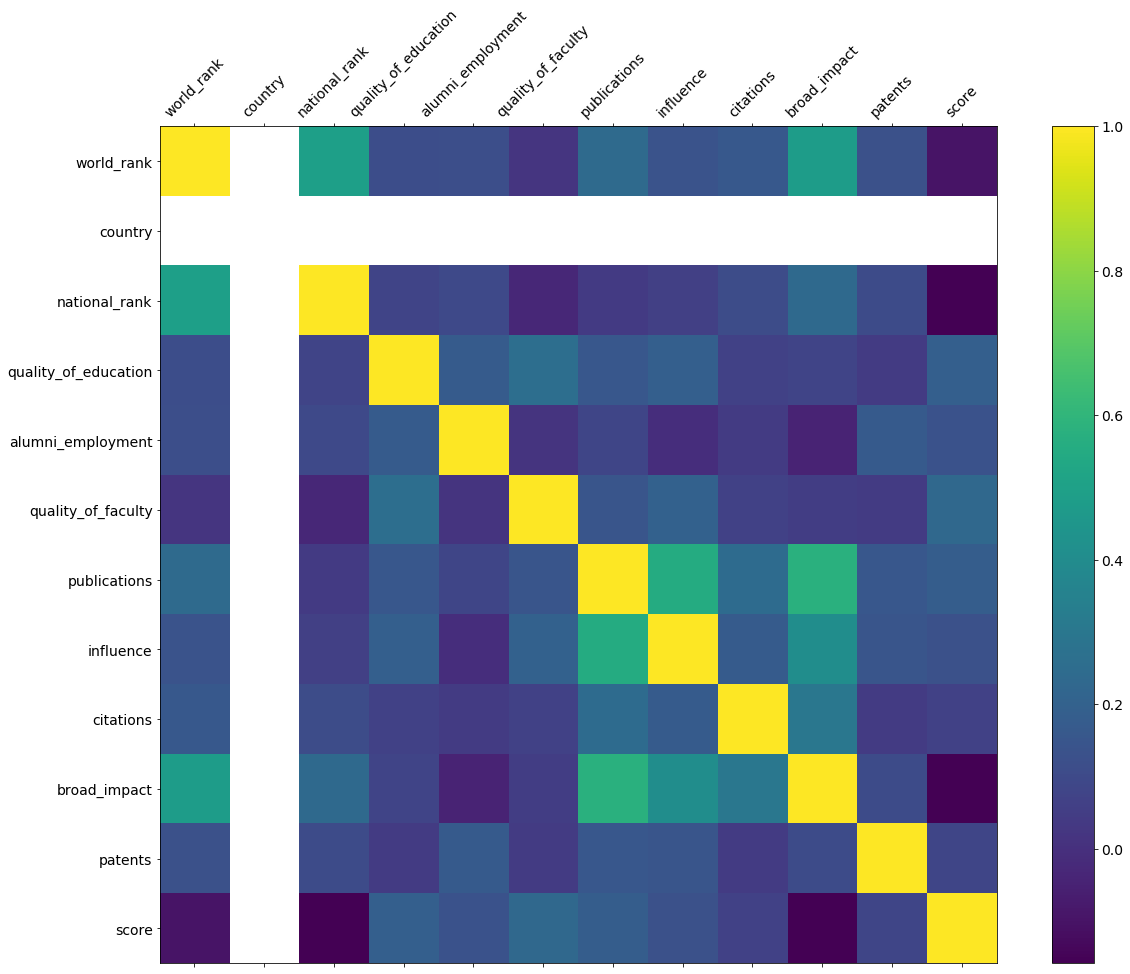

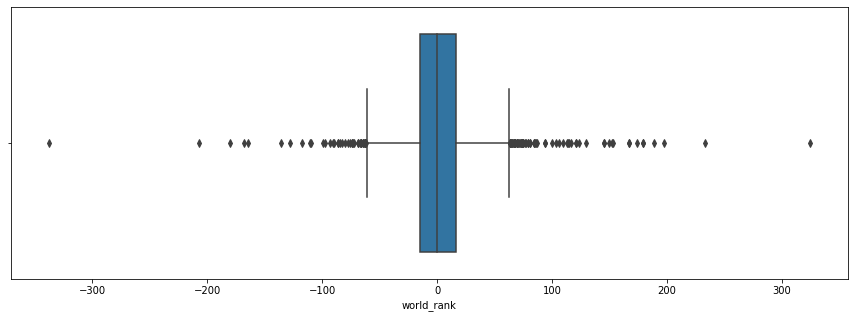

In [6]:
cwur_indexed = cwur_imputed.set_index(['year', 'institution'])


cwur_diff = cwur_indexed.groupby(by='institution').diff()


#Heatmap
fig1 = plt.figure(figsize=(20, 15))
plt.matshow(cwur_diff.corr(), fignum=fig1.number)
plt.xticks(range(cwur_diff.shape[1]), cwur_diff.columns, fontsize=14, rotation=45)
plt.yticks(range(cwur_diff.shape[1]), cwur_diff.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)


fig1 = plt.figure(figsize=(15, 5))
ax = sb.boxplot(x=cwur_diff['world_rank'])
cwur_diff



In [7]:


#reformat data so years are columns
hdi_ref = hdi.melt(id_vars=['HDI Rank', 'Country'], var_name='year', value_name='HDI')

hdi_ref['year'] = pd.to_numeric(hdi_ref['year'])


#rename columns for better readability
hdi_ref = hdi_ref.rename(columns={'Country': 'country', 'HDI Rank': 'hdi_rank', 'HDI':'hdi'})

#strip whitespace
hdi_ref['country'] = hdi_ref['country'].str.strip()
#set index
hdi_indexed = hdi_ref.set_index(['year', 'country'])
hdi_indexed = hdi_indexed.loc[(slice(2012, 2015))]

hdi_ref = hdi_indexed.reset_index()


In [8]:
#first we transform back our label encoding so we can merge

cwur_imputed['country'] = encCon.inverse_transform(cwur['country'])
cwur_imputed['institution'] = encInst.inverse_transform(cwur['institution'])

#in this step we merge with cwur_imputed data

#first check if  country names are different in both
country_check =  cwur_imputed[~cwur_imputed['country'].isin(hdi_ref['country'])]
print(country_check.country.unique())

#rename and replace names which don't match
#(no data for taiwan and puerto rico available)
country_dict = {"United States" : "USA",
                "Korea (Republic of)" : "South Korea",
                "Russian Federation" : "Russia",
                "Iran (Islamic Republic of)":"Iran",
                "Hong Kong, China (SAR)":"Hong Kong",
                "Czechia": "Czech Republic",
                "Slovakia" : "Slovak Republic"}
for key, value in country_dict.items():
    hdi_ref.replace(key, value, inplace=True)



#merge
cwur_hdi = pd.merge(cwur_imputed, hdi_ref, left_on=['year','country'], right_on = ['year','country'])


hdi_ref

['USA' 'South Korea' 'Russia' 'Taiwan' 'Hong Kong' 'Czech Republic'
 'Slovak Republic' 'Iran' 'Puerto Rico']


,year,country,hdi_rank,hdi
0,2012,Afghanistan,168,0.482
1,2012,Albania,68,0.767
2,2012,Algeria,85,0.740
3,2012,Andorra,35,0.849
4,2012,Angola,147,0.543
5,2012,Antigua and Barbuda,70,0.765
6,2012,Argentina,47,0.818
7,2012,Armenia,83,0.737
8,2012,Australia,3,0.929
9,2012,Austria,20,0.899


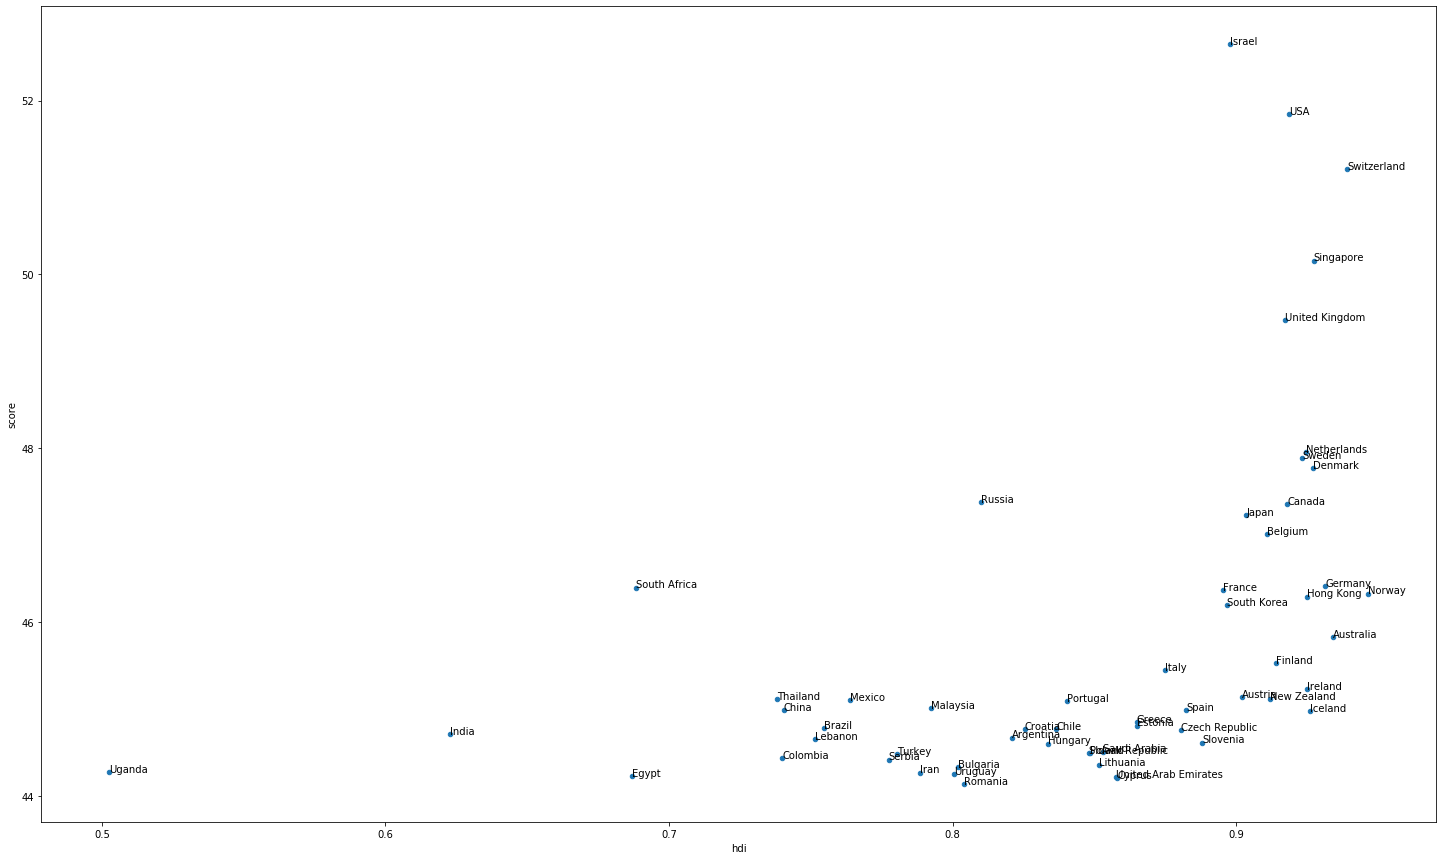

In [9]:
#check how HDI of countries correlates with rankings

#calculate mean world rank

cwur_hdi_mean = cwur_hdi.groupby("country").mean()

fig, ax = plt.subplots()
cwur_hdi_mean.plot("hdi", "score", kind="scatter",
             figsize = (25,15), ax=ax)

for k, v in cwur_hdi_mean.iterrows():
    x = v["hdi"]
    y = v["score"]
    ax.annotate(k, (x,y))
      
plt.show()


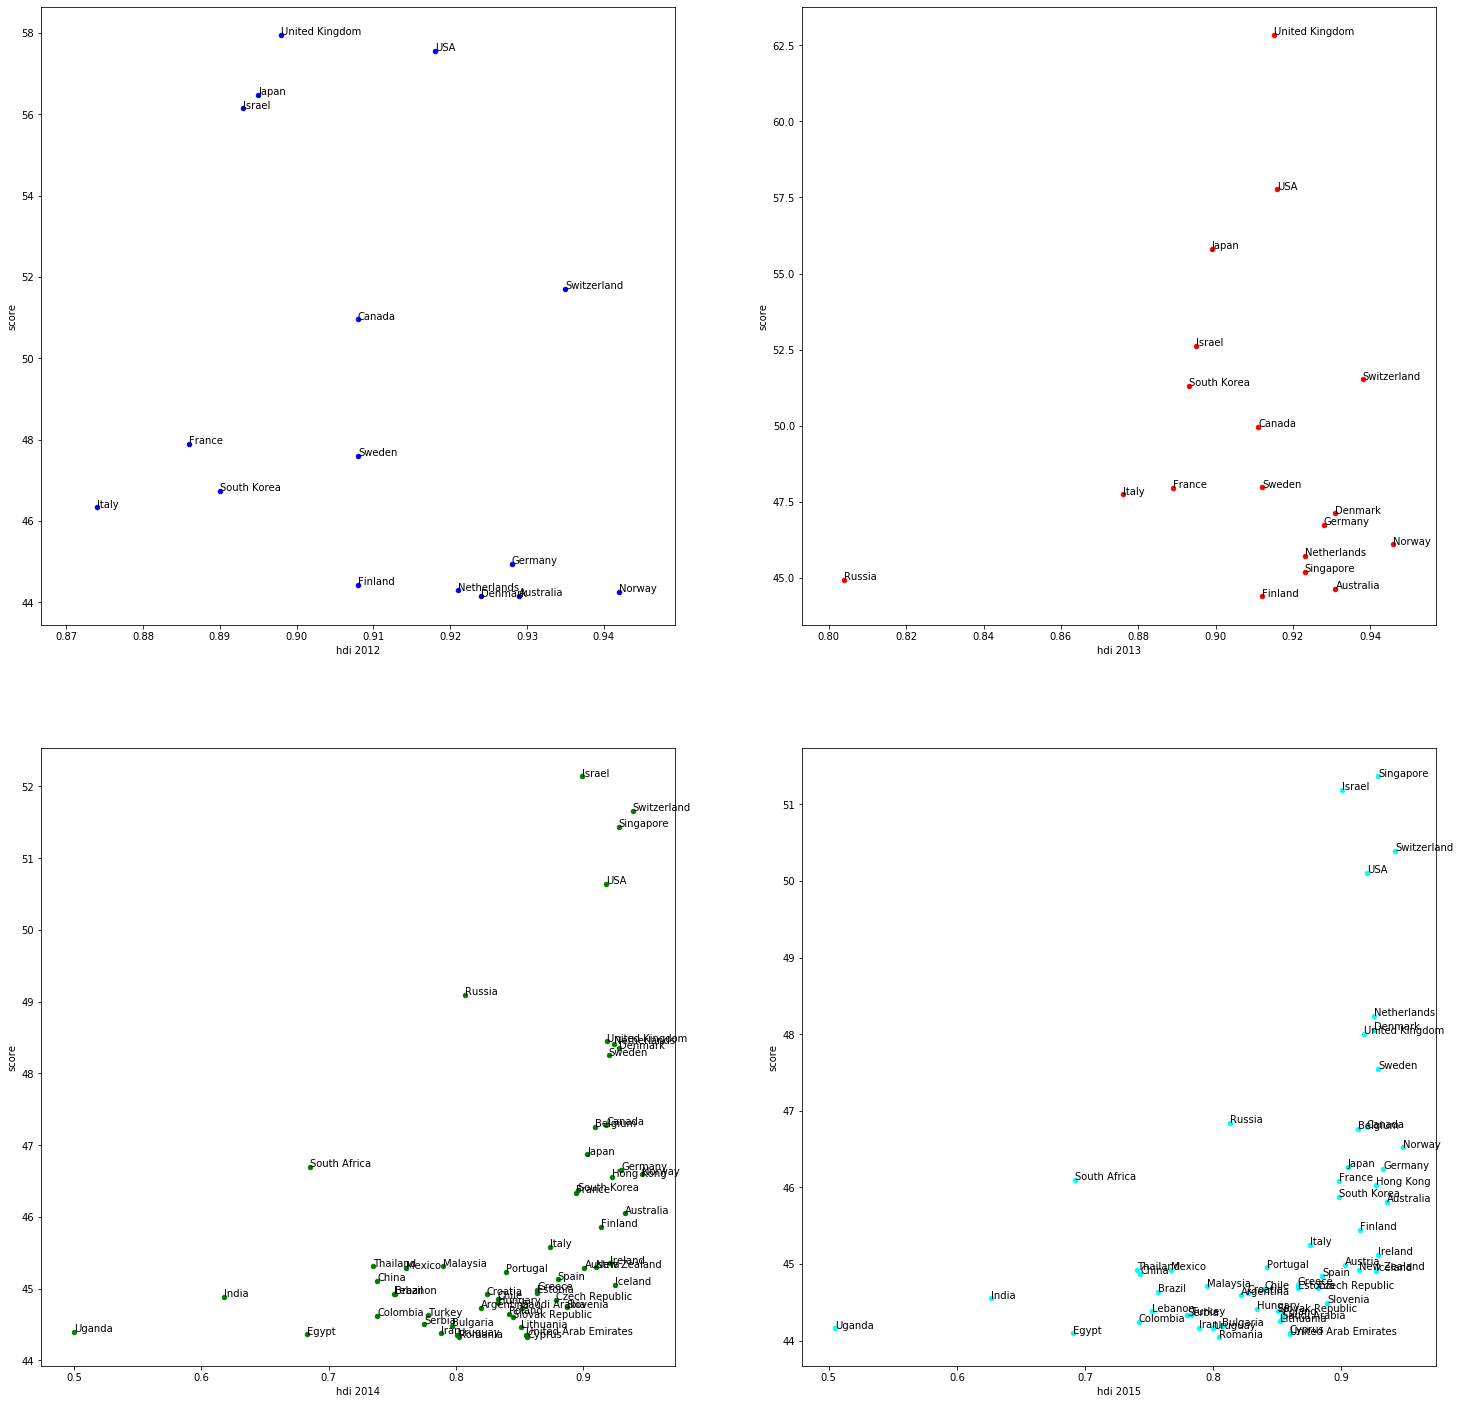

In [58]:
#check how HDI of countries correlates with rankings

#calculate mean world rank

cwur_hdi_mean = cwur_hdi.groupby(["year", "country"]).mean()
cwur_hdi_mean12 = cwur_hdi_mean.iloc[cwur_hdi_mean.index.get_level_values('year') == 2012.0]
cwur_hdi_mean13 = cwur_hdi_mean.iloc[cwur_hdi_mean.index.get_level_values('year') == 2013.0]
cwur_hdi_mean14 = cwur_hdi_mean.iloc[cwur_hdi_mean.index.get_level_values('year') == 2014.0]
cwur_hdi_mean15 = cwur_hdi_mean.iloc[cwur_hdi_mean.index.get_level_values('year') == 2015.0]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 45))
cwur_hdi_mean12.plot("hdi", "score", kind="scatter",
             figsize = figsize, ax=axs[0,0], color = "blue")
axs[0,0].set_xlabel("hdi 2012")


for k, v in cwur_hdi_mean12.iterrows():
    x = v["hdi"]
    y = v["score"]
    axs[0,0].annotate(k[1], (x,y))

cwur_hdi_mean13.plot("hdi", "score", kind="scatter",
             figsize = figsize, ax=axs[0,1], color = "red")
axs[0,1].set_xlabel("hdi 2013")
for k, v in cwur_hdi_mean13.iterrows():
    x = v["hdi"]
    y = v["score"]
    axs[0,1].annotate(k[1], (x,y))

cwur_hdi_mean14.plot("hdi", "score", kind="scatter",
             figsize = figsize, ax=axs[1,0], color = "green")
axs[1,0].set_xlabel("hdi 2014")
for k, v in cwur_hdi_mean14.iterrows():
    x = v["hdi"]
    y = v["score"]
    axs[1,0].annotate(k[1], (x,y))

cwur_hdi_mean15.plot("hdi", "score", kind="scatter",
             figsize = figsize, ax=axs[1,1], color = "cyan")
axs[1,1].set_xlabel("hdi 2015")
for k, v in cwur_hdi_mean15.iterrows():
    x = v["hdi"]
    y = v["score"]
    axs[1,1].annotate(k[1], (x,y))
    
    
plt.show()
